# Task 1 Classification

## PLAN

Binary classification for healthy vs irregular heartbeats


## ANALYZE

### 2.1 Import, Load and Examine

In [73]:
# Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.ensemble import GradientBoostingClassifier  # GBM
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.tree import DecisionTreeClassifier  # Decision Trees
from sklearn.svm import SVC # SVC
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors (KNN)
from xgboost import XGBClassifier  # XGBoost
from lightgbm import LGBMClassifier  # LightGBM

from scipy.stats import randint, uniform

# Evaluate
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score, \
precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Save model
import pickle

# Ignore warning
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 100)
plt.style.use('ggplot')

In [74]:
df_abnormal = pd.read_csv("ecg_dataset/ptbdb_abnormal.csv", header=None)
df_normal = pd.read_csv("ecg_dataset/ptbdb_normal.csv", header=None)
df = pd.concat([df_abnormal, df_normal], axis=0)

In [75]:
df_abnormal

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
df_normal

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
print(df_abnormal.info())
print()
print(df_normal.info())
print()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB
None

<class 'pandas.core.frame.DataFrame'>
Index: 14552 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 21.0 MB
None


### 2.2 Data Cleaning

In [79]:
# Check missing values
df_abnormal.isna().sum().sum(), df_normal.isna().sum().sum()

(np.int64(0), np.int64(0))

In [80]:
# Check duplicated
df_abnormal.duplicated().sum(), df_normal.duplicated().sum()

(np.int64(6), np.int64(1))

### 2.3 Exploratory Data Analysis (EDA)

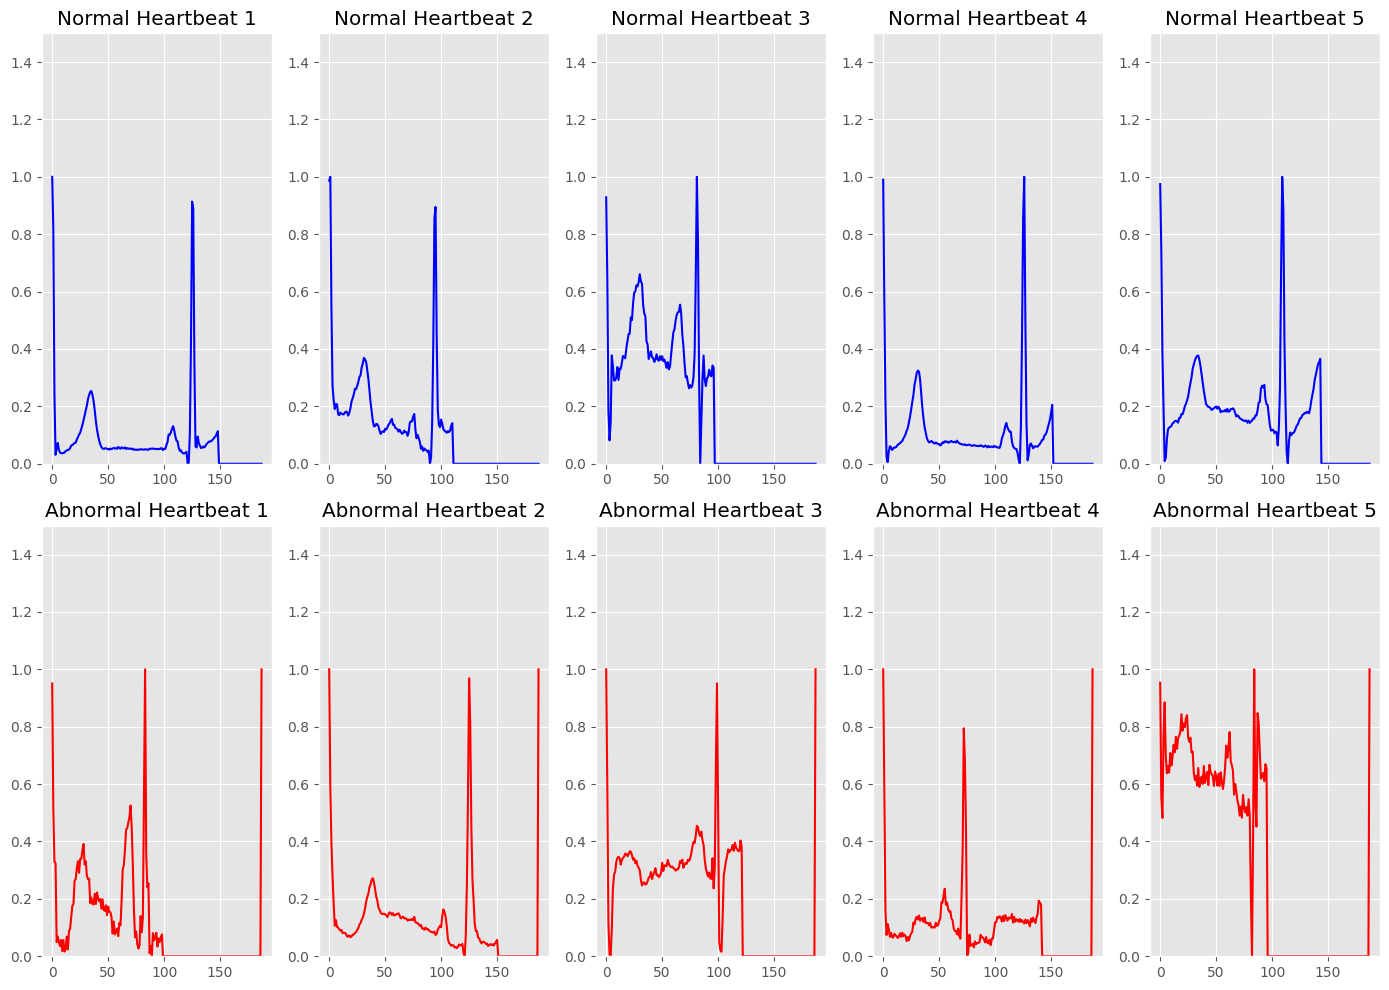

In [81]:
# Randomly select a few heartbeats from both normal and abnormal datasets and viz them
sample_normal = df_normal.sample(5)
sample_abnormal = df_abnormal.sample(5)

plt.figure(figsize=(14, 10))

# Plotting normal heartbeats
for i, row in enumerate(sample_normal.iterrows()):
    plt.subplot(2, 5, i+1)  
    plt.plot(row[1], color='blue')
    plt.title('Normal Heartbeat ' + str(i+1))
    plt.ylim(0, 1.5)
    plt.tight_layout()

# Plotting abnormal heartbeats
for i, row in enumerate(sample_abnormal.iterrows()):
    plt.subplot(2, 5, i+6) 
    plt.plot(row[1], color='red')
    plt.title('Abnormal Heartbeat ' + str(i+1))
    plt.ylim(0, 1.5)
    plt.tight_layout()

plt.show()


## CONSTRUCT

### 3.1 Data Processing

In [82]:
# build model

# set x and y
x = df.drop(187, axis=1)
y = df[187].values

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


### 3.2 Explore Distinct Model

In [83]:
# Initialize the models
models = {
    "gbm": GradientBoostingClassifier(random_state=1),
    "rf": RandomForestClassifier(random_state=1),
    "dc": DecisionTreeClassifier(random_state=1),
    "svm": SVC(random_state=1),
    "knn": KNeighborsClassifier(),
    "xgb": XGBClassifier(random_state=1),
    "lgbm": LGBMClassifier(random_state=1)
}

# Loop through the models dictionary
for name, model in models.items():
    model.fit(x_train, y_train)

# Start Predict
predictions = {}  
for name, model in models.items():
    predictions[f"y_pred_{name}"] = model.predict(x_test)

# Accuracy Score
scores = {}
for name, y_pred in predictions.items():
    scores[f"score_{name}"] = models[name[7:]].score(x_test, y_test)

scores

[LightGBM] [Info] Number of positive: 7389, number of negative: 2797
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42043
[LightGBM] [Info] Number of data points in the train set: 10186, number of used features: 184
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.725407 -> initscore=0.971445
[LightGBM] [Info] Start training from score 0.971445


{'score_y_pred_gbm': 0.9326614750343564,
 'score_y_pred_rf': 0.9688502061383417,
 'score_y_pred_dc': 0.9099862574438846,
 'score_y_pred_svm': 0.9015116811726981,
 'score_y_pred_knn': 0.9264773247824095,
 'score_y_pred_xgb': 0.9821346770499313,
 'score_y_pred_lgbm': 0.978240952817224}

### 3.3 Hyperparameter Tuning

In [84]:
# Hyperparameter tuning for XGBoost
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0, 1),
    'subsample': uniform(0, 1),
    'max_depth': randint(1, 20),
    'colsample_bytree': uniform(0, 1),
    'min_child_weight': randint(0, 10)
}

xgb = XGBClassifier(random_state=1)

xgb_cv = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=25, scoring='accuracy', cv=4, random_state=1)
xgb_cv.fit(x_train, y_train)

# Print the best parameters and the corresponding score
print("Tuned XGBoost Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

Tuned XGBoost Parameters: {'colsample_bytree': np.float64(0.5783896143871318), 'learning_rate': np.float64(0.40813680276128117), 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 121, 'subsample': np.float64(0.7715949980443677)}
Best score is 0.975357890665697


The best model is XBGoost. However, the score is even lower when we perform hyperparameter turning, so let's keep default options.

### 3.4 Evaluate Model

#### 3.4.1 Confusion Matrix

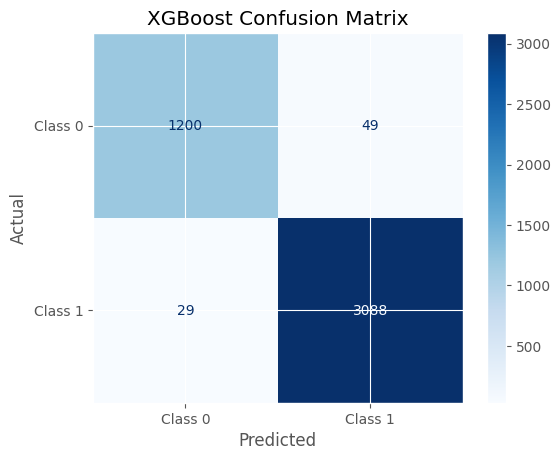

In [85]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions["y_pred_xgb"])
cmd = ConfusionMatrixDisplay(cm, display_labels=["Class 0", "Class 1"])
cmd.plot(cmap="Blues")
cmd.ax_.set(title="XGBoost Confusion Matrix", xlabel="Predicted", ylabel="Actual")
plt.show()


#### 3.4.2 Scores

In [86]:
# from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

# Metrics dictionary to store the scores
metrics = {}

# Calculate F1, Precision, Recall, AUC, and Accuracy for each model
for name, model in models.items():
    y_pred = predictions[f"y_pred_{name}"]
    y_true = y_test  
    metrics[name] = {
        'f1': f1_score(y_true, y_pred, average='binary'),
        'precision': precision_score(y_true, y_pred, average='binary'),
        'recall': recall_score(y_true, y_pred, average='binary'),
        'accuracy': accuracy_score(y_true, y_pred)
    }
    if f"y_proba_{name}" in predictions:
        y_proba = predictions[f"y_proba_{name}"]
        metrics[name]['auc'] = roc_auc_score(y_true, y_proba)

# Print the calculated metrics for each model
for name, scores in metrics.items():
    print(f"Metrics for {name}:")
    for metric, value in scores.items():
        print(f"  {metric}: {value}")


Metrics for gbm:
  f1: 0.953348143446525
  precision: 0.9431711145996861
  recall: 0.9637471928136028
  accuracy: 0.9326614750343564
Metrics for rf:
  f1: 0.9784126984126984
  precision: 0.9682689286836318
  recall: 0.9887712544112929
  accuracy: 0.9688502061383417
Metrics for dc:
  f1: 0.9364797155325683
  precision: 0.9436482084690554
  recall: 0.9294193134424126
  accuracy: 0.9099862574438846
Metrics for svm:
  f1: 0.9325172630257376
  precision: 0.9127496159754225
  recall: 0.9531600898299647
  accuracy: 0.9015116811726981
Metrics for knn:
  f1: 0.9479656346247366
  precision: 0.9580602883355177
  recall: 0.9380814886108437
  accuracy: 0.9264773247824095
Metrics for xgb:
  f1: 0.9875279820914614
  precision: 0.9843799808734459
  recall: 0.9906961822264998
  accuracy: 0.9821346770499313
Metrics for lgbm:
  f1: 0.9848315503752195
  precision: 0.9802924348378894
  recall: 0.9894128970163619
  accuracy: 0.978240952817224


In [87]:
# Save model
with open('model_t1.pkl', 'wb') as file:
    pickle.dump(models['xgb'], file)

## CONSLUSION

We finished classification on the dataset and determined that the best model is XGBoost. Next, we will apply this model used for prediction in task 2.